In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import mlflow
#import mlflow.sklearn

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 15, Finished, Available)

In [14]:
np.random.seed(123)
n_samples = 500

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 16, Finished, Available)

In [15]:
#Create a random matrix with samples. Each sample will have 5 features
X = np.random.rand(n_samples, 5)
#Create a target variable based on the features in X
#X[:, 0] referst to the first feature of X, and X[:, 1] refers to the second feature
#np.random.randn(n_samples)  creates random noise to the linear combination
y = 2 * X[:, 0] + 0.5 * X[:, 1] + 0.3*np.random.randn(n_samples) 

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 17, Finished, Available)

In [16]:
X.shape

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 18, Finished, Available)

(500, 5)

In [17]:
X

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 19, Finished, Available)

array([[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897],
       [0.42310646, 0.9807642 , 0.68482974, 0.4809319 , 0.39211752],
       [0.34317802, 0.72904971, 0.43857224, 0.0596779 , 0.39804426],
       ...,
       [0.91136549, 0.06099491, 0.99170845, 0.39779301, 0.54566353],
       [0.64373406, 0.48527832, 0.52788834, 0.41715562, 0.18688335],
       [0.96944284, 0.80109614, 0.59789158, 0.05658185, 0.89472364]])

In [18]:
y.shape

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 20, Finished, Available)

(500,)

In [19]:
y

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 21, Finished, Available)

array([ 1.4839305 ,  1.69370135,  1.41595263,  1.6262707 ,  1.34431425,
        1.10071352,  0.10902937,  0.79648513,  1.58978757,  1.07004817,
        0.55004004,  1.00484756,  1.16883486,  0.40651713,  1.07476412,
        1.87027277,  1.18428215,  1.81948843,  2.161775  ,  1.45199887,
        1.41003717,  1.77289666,  0.57805204,  1.61179333,  1.5935169 ,
        2.32878626,  1.25449984,  0.1562825 , -0.5171704 ,  1.83115802,
        0.77913143,  0.80334232,  1.65223962,  1.35115657,  1.8383107 ,
        0.15894216,  1.1639405 ,  1.5880091 ,  0.63621583,  1.02092637,
        1.20242409,  1.44220937,  1.46602539,  1.04702935,  1.1403957 ,
        0.74319558,  0.67920996,  0.69003074, -0.21108396,  1.71557874,
        0.68698007,  2.04281176,  1.18462757,  0.95055674,  1.22499218,
        0.86941369,  1.48576483,  2.00047949,  1.39879291,  2.66902112,
        0.34391459,  1.93670876,  1.27871683,  2.35887439,  0.1828858 ,
        1.0555496 ,  1.67305399,  0.90824146,  2.00521835,  0.62

In [20]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 22, Finished, Available)

In [21]:
experiment_name = "mlflow_experiment"
mlflow.set_experiment(experiment_name)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 23, Finished, Available)

<Experiment: artifact_location='', creation_time=1717542265066, experiment_id='1807a7a2-a5bf-452f-86bc-b85470320b41', last_update_time=None, lifecycle_stage='active', name='mlflow_experiment', tags={}>

In [22]:
# Train a model
model = Ridge(alpha = 0.5)
model.fit(X_train, y_train)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 24, Finished, Available)

Ridge(alpha=0.5)

In [23]:
from mlflow.types.schema import Schema, ColSpec
from mlflow.models.signature import ModelSignature

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 25, Finished, Available)

In [24]:
input_schema = Schema([
        ColSpec("double", "A"),
        ColSpec("double", "B"),
        ColSpec("double", "C"),
        ColSpec("double", "D"),
        ColSpec("double", "E")
     ])
output_schema = Schema([ColSpec("double")])
signature = ModelSignature(inputs=input_schema, outputs=output_schema)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 26, Finished, Available)

In [25]:
# Log model details with MLflow
with mlflow.start_run():
    #mlflow.autolog()
    mlflow.log_params({"alpha": 0.5})  # Hyperparameters
    mlflow.log_metrics({"MAE": np.mean(np.abs(model.predict(X_test) - y_test)),
                        "RMSE": np.sqrt(np.mean((model.predict(X_test) - y_test) ** 2)),
                        "R2": model.score(X_test, y_test)})
    mlflow.sklearn.log_model(model, "ridge_model", signature=signature)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 27, Finished, Available)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 28, Finished, Available)

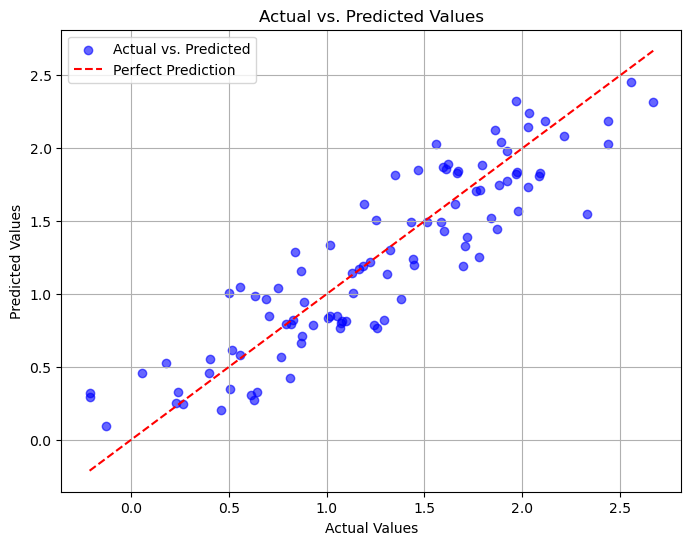

In [26]:
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model.predict(X_test)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.6, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
model = Ridge(alpha = 0.1)
model.fit(X_train, y_train)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 29, Finished, Available)

Ridge(alpha=0.1)

In [28]:
with mlflow.start_run():
    mlflow.log_params({"alpha": 0.1})  # Hyperparameters
    mlflow.log_metrics({"MAE": np.mean(np.abs(model.predict(X_test) - y_test)),
                        "RMSE": np.sqrt(np.mean((model.predict(X_test) - y_test) ** 2)),
                        "R2": model.score(X_test, y_test)})
    mlflow.sklearn.log_model(model, "ridge_model", signature=signature)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 30, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [29]:
model = Ridge(alpha = 1)
model.fit(X_train, y_train)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 31, Finished, Available)

Ridge(alpha=1)

In [30]:
with mlflow.start_run():
    mlflow.log_params({"alpha": 1})  # Hyperparameters
    mlflow.log_metrics({"MAE": np.mean(np.abs(model.predict(X_test) - y_test)),
                        "RMSE": np.sqrt(np.mean((model.predict(X_test) - y_test) ** 2)),
                        "R2": model.score(X_test, y_test)})
    mlflow.sklearn.log_model(model, "ridge_model", signature=signature)

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 32, Finished, Available)

/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/_distutils_hack/__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/home/trusted-service-user/cluster-env/trident_env/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [32]:
run_id = "ad2a8175-2961-4c9b-8391-0b37928fcc39"
run = mlflow.get_run(run_id)
metrics = run.data.metrics
metrics

StatementMeta(, ee76adfe-415c-40ba-9c29-ee40fb9141f9, 34, Finished, Available)

{'MAE': 0.23606709227423203,
 'RMSE': 0.2846741795967289,
 'R2': 0.8059774308731518}